In [1]:
#Monika ISahakyan
#Cohort: 5


###################
# Importing Packages
####################

import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn.linear_model
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression



In [2]:
# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#########################################
# Load Data & Preprocess Data
#########################################
# Reading the file into Python
original_df = pd.read_excel('Apprentice_Chef_Dataset.xlsx')


original_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 29 columns):
REVENUE                         1946 non-null float64
CROSS_SELL_SUCCESS              1946 non-null int64
NAME                            1946 non-null object
EMAIL                           1946 non-null object
FIRST_NAME                      1946 non-null object
FAMILY_NAME                     1899 non-null object
TOTAL_MEALS_ORDERED             1946 non-null int64
UNIQUE_MEALS_PURCH              1946 non-null int64
CONTACTS_W_CUSTOMER_SERVICE     1946 non-null int64
PRODUCT_CATEGORIES_VIEWED       1946 non-null int64
AVG_TIME_PER_SITE_VISIT         1946 non-null float64
MOBILE_NUMBER                   1946 non-null int64
CANCELLATIONS_BEFORE_NOON       1946 non-null int64
CANCELLATIONS_AFTER_NOON        1946 non-null int64
TASTES_AND_PREFERENCES          1946 non-null int64
PC_LOGINS                       1946 non-null int64
MOBILE_LOGINS                   1946 non-null int64
W

In [3]:
# descriptive statistics
original_df.describe().round(2)

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,0.68,74.63,4.9,6.98,5.38,99.60,0.88,1.40,0.17,0.71,5.52,1.48,11.33,1.49,2.97,0.36,0.11,35.41,150.56,4.44,0.60,2.79,13.51,106.43
std,1138.29,0.47,55.31,2.5,2.28,3.04,62.34,0.33,1.55,0.43,0.45,0.58,0.53,13.57,2.32,2.74,0.48,0.32,26.58,49.45,1.55,0.64,0.76,2.33,181.01
min,131.00,0.00,11.00,1.0,1.00,1.00,10.33,0.00,0.00,0.00,0.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,33.40,0.00,0.00,1.00,5.00,0.00
25%,1350.00,0.00,39.00,3.0,5.00,3.00,72.00,1.00,0.00,0.00,0.00,5.00,1.00,1.00,0.00,1.00,0.00,0.00,10.00,114.40,3.00,0.00,2.00,12.00,0.00
50%,1740.00,1.00,60.00,5.0,7.00,5.00,94.16,1.00,1.00,0.00,1.00,6.00,1.00,7.00,0.00,2.00,0.00,0.00,30.00,145.60,4.00,1.00,3.00,13.00,0.00
75%,2670.00,1.00,95.00,7.0,8.00,8.00,117.29,1.00,2.00,0.00,1.00,6.00,2.00,13.00,3.00,4.00,1.00,0.00,60.00,173.78,5.00,1.00,3.00,15.00,174.00
max,8793.75,1.00,493.00,19.0,18.00,10.00,1645.60,1.00,13.00,3.00,1.00,7.00,3.00,52.00,9.00,19.00,1.00,1.00,90.00,564.20,11.00,3.00,5.00,19.00,1600.00


Let's see what kind of missing values do we have!

In [4]:
# missing values 
original_df.isnull().sum()

REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
PC_LOGINS                        0
MOBILE_LOGINS                    0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

As we can see only missing values are in "Family Name " column. This mean we probably do not know the family name of 47 people

In [5]:
# let's create the base model 
# looping over columns with missing values
for col in original_df:

    # creating columns with 1s if missing and 0 if not
    if original_df[col].isnull().astype(int).sum() > 0:
        original_df['m_'+col] = original_df[col].isnull().astype(int)

# blueprinting a model type
lm_revenue_avg_vid = smf.ols(formula = """REVENUE ~ original_df['TOTAL_MEALS_ORDERED']""",
                        data = original_df)


results = lm_revenue_avg_vid .fit()

# printing the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     1096.
Date:                Sat, 07 Mar 2020   Prob (F-statistic):          4.99e-191
Time:                        19:26:18   Log-Likelihood:                -16020.
No. Observations:                1946   AIC:                         3.204e+04
Df Residuals:                    1944   BIC:                         3.206e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

# Analyzing Outliers

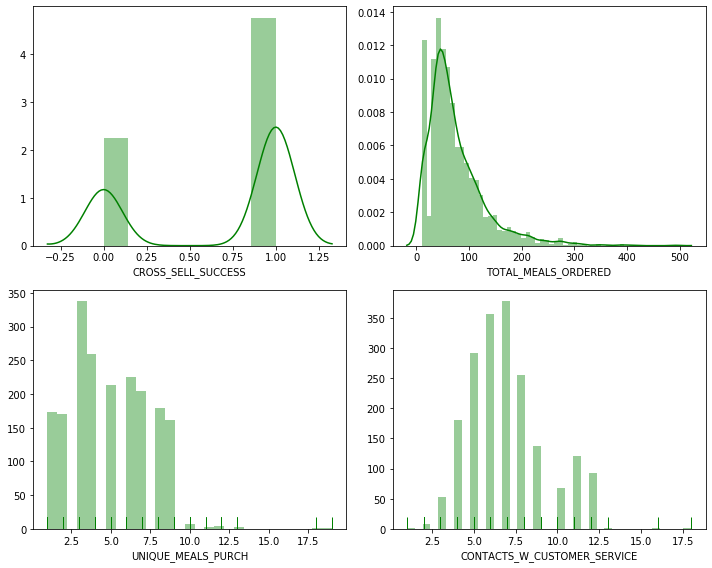

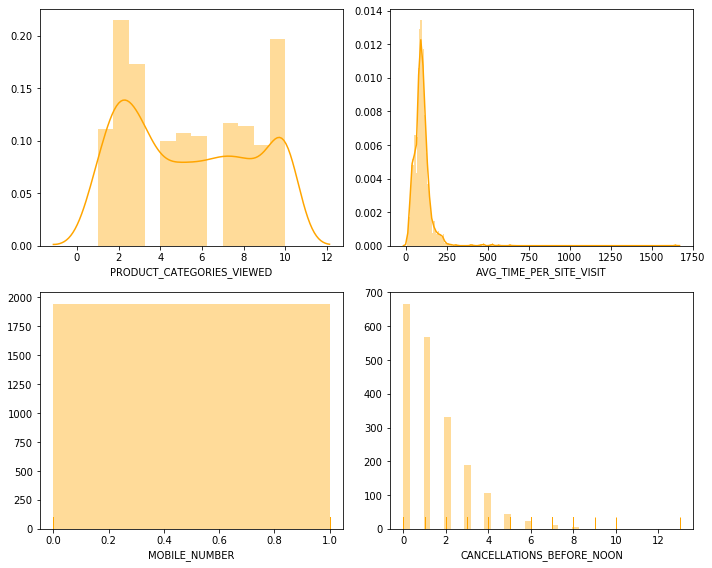

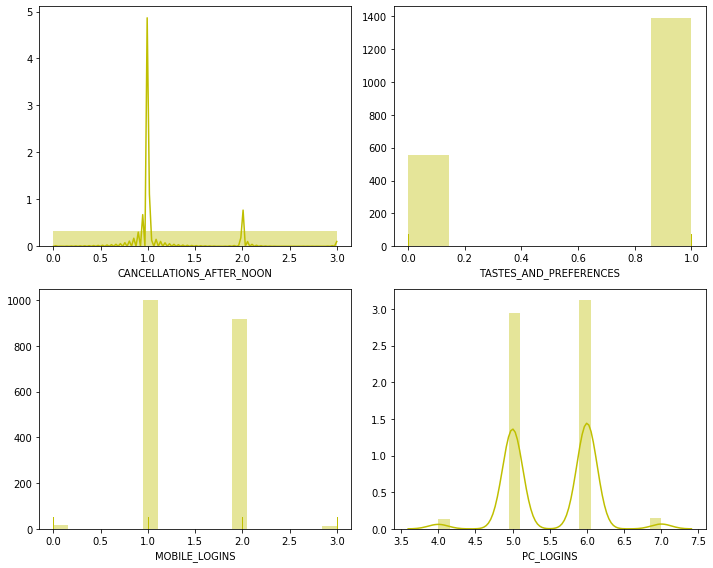

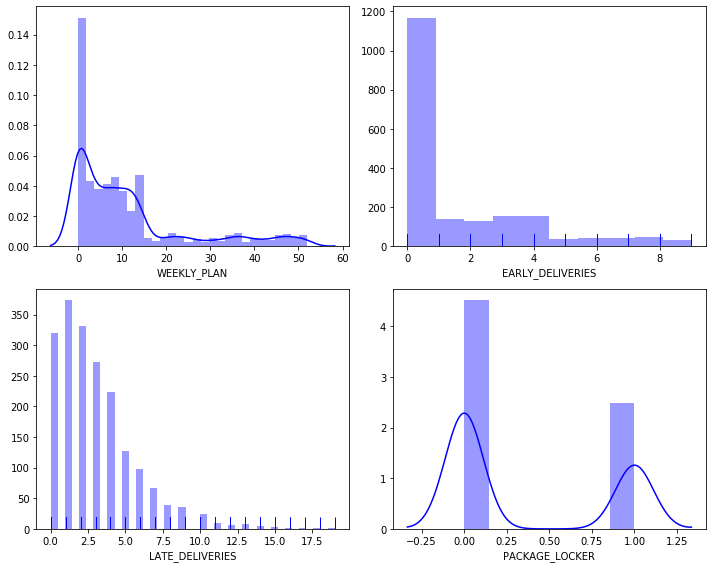

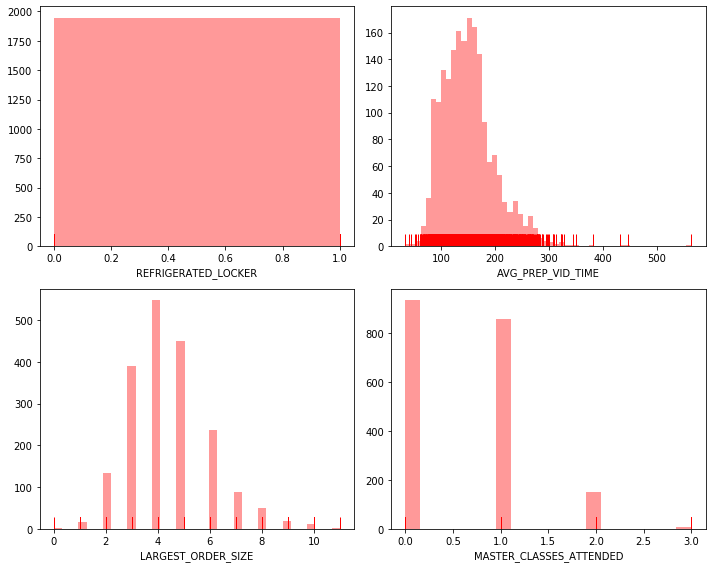

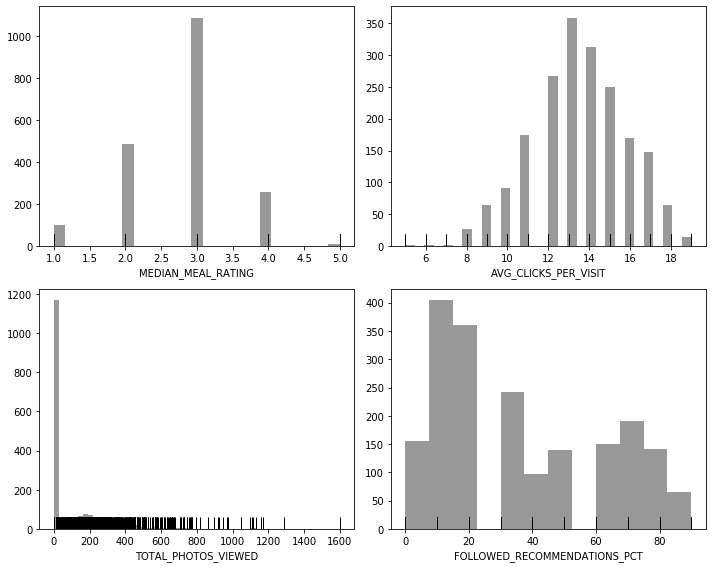

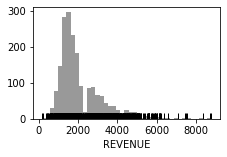

In [6]:
### Visualising EDA (Histograms)  ###########

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['CROSS_SELL_SUCCESS'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('CROSS_SELL_SUCCESS')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'g')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################
plt.subplot(2, 2, 4)
sns.distplot(original_df['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'g')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
plt.tight_layout()
plt.savefig('Apprentice Chef Data Histograms 1 of 6.png')
plt.show()

########################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['MOBILE_NUMBER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('MOBILE_NUMBER')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'orange')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')
plt.tight_layout()
plt.savefig('Apprentice Chef Data Histograms 2 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'y')
plt.xlabel('TASTES_AND_PREFERENCES')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['MOBILE_LOGINS'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'y')
plt.xlabel('MOBILE_LOGINS')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['PC_LOGINS'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('PC_LOGINS')
plt.tight_layout()
plt.savefig('Apprentice Chef Data Histograms 3 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'blue')
plt.xlabel('WEEKLY_PLAN')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['EARLY_DELIVERIES'],
             bins = 10,
             kde  = False,
             rug  = True,
             color = 'blue')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['LATE_DELIVERIES'],
             bins = 'fd',
             kde  = False,
             rug  = True,
             color = 'blue')
plt.xlabel('LATE_DELIVERIES')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['PACKAGE_LOCKER'],
             bins  = 'fd',
             color = 'blue')
plt.xlabel('PACKAGE_LOCKER')
plt.tight_layout()
plt.savefig('Apprentice Chef Data Histograms 4 of 6.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['REFRIGERATED_LOCKER'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('REFRIGERATED_LOCKER')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('AVG_PREP_VID_TIME')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('LARGEST_ORDER_SIZE')

########################

plt.subplot(2, 2, 4)
sns.distplot(original_df['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'r')
plt.xlabel('MASTER_CLASSES_ATTENDED')
plt.tight_layout()
plt.savefig('Apprentice Chef Data Histograms 5 of 6.png')
plt.show()

########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['MEDIAN_MEAL_RATING'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'black')
plt.xlabel('MEDIAN_MEAL_RATING')

########################

plt.subplot(2, 2, 2)
sns.distplot(original_df['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'black')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################

plt.subplot(2, 2, 3)
sns.distplot(original_df['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'black')
plt.xlabel('TOTAL_PHOTOS_VIEWED')

########################
plt.subplot(2, 2, 4)
sns.distplot(original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'black')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')
plt.tight_layout()
plt.show()
#########################################
plt.subplot(2, 2, 4)
sns.distplot(original_df['REVENUE'],
             bins  = 'fd',
             kde   = False,
             rug   = True,
             color = 'black')
plt.xlabel('REVENUE')
plt.tight_layout()
plt.savefig('Apprentice Chef Data Histograms 6 of 6.png')
plt.show()

In [7]:
# setting outlier thresholds

TOTAL_MEALS_ORDERED_hi            = 300
TOTAL_MEALS_ORDERED_lo            = 0.5
UNIQUE_MEALS_PURCH_hi             = 9
UNIQUE_MEALS_PURCH_lo             = 0.9 
CONTACTS_W_CUSTOMER_SERVICE_hi    = 13
CONTACTS_W_CUSTOMER_SERVICE_lo    = 2
PRODUCT_CATEGORIES_VIEWED_hi      = 10
PRODUCT_CATEGORIES_VIEWED_lo      = 1
AVG_TIME_PER_SITE_VISIT_hi        = 200
CANCELLATIONS_BEFORE_NOON_hi      = 5
CANCELLATIONS_AFTER_NOON_hi       = 3
PC_LOGINS_hi                      = 7
PC_LOGINS_lo                      = 3
MOBILE_LOGINS_hi                  = 2
WEEKLY_PLAN_hi                    = 50.5
EARLY_DELIVERIES_hi               = 4
LATE_DELIVERIES_hi                = 5
AVG_PREP_VID_TIME_hi              = 300
FOLLOWED_RECOMMENDATIONS_PCT_hi   = 90  
LARGEST_ORDER_SIZE_hi             = 7
LARGEST_ORDER_SIZE_lo             = 2
AVG_CLICKS_PER_VISIT_lo           = 6
AVG_CLICKS_PER_VISIT_hi           = 19
TOTAL_PHOTOS_VIEWED_hi            = 550

REVENUE_hi     = 2500

In [8]:
# developing features (columns) for outliers

# TOTAL MEALS ORDERED
original_df['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]
condition_lo = original_df.loc[0:,'out_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] < TOTAL_MEALS_ORDERED_lo]

original_df['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# UNIQUE MEALS PURCH
original_df['out_UNIQUE_MEALS_PURCH'] = 0
condition_hi = original_df.loc[0:,'out_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi]
condition_lo = original_df.loc[0:,'out_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] < UNIQUE_MEALS_PURCH_lo]

original_df['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# CONTACTS W CUSTOMER SERVICE
original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = original_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]
condition_lo = original_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] < CONTACTS_W_CUSTOMER_SERVICE_lo]

original_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)

original_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo,
                                        value      = 1,
                                        inplace    = True)

# PRODUCT CATEGORIES VIEWED
original_df['out_PRODUCT_CATEGORIES_VIEWED'] = 0
condition_hi = original_df.loc[0:,'out_PRODUCT_CATEGORIES_VIEWED'][original_df['PRODUCT_CATEGORIES_VIEWED'] > PRODUCT_CATEGORIES_VIEWED_hi]
condition_lo = original_df.loc[0:,'out_PRODUCT_CATEGORIES_VIEWED'][original_df['PRODUCT_CATEGORIES_VIEWED'] < PRODUCT_CATEGORIES_VIEWED_lo]

original_df['out_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# AVG TIME PER SITE VISIT
original_df['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = original_df.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]

original_df['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)

# CANCELLATIONS_BEFORE_NOON
original_df['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = original_df.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]

original_df['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                        value      = 1,
                                        inplace    = True)

# CANCELLATIONS AFTER_NOON
original_df['out_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = original_df.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_hi]

original_df['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# PC LOGINS
original_df['out_PC_LOGINS'] = 0
condition_hi = original_df.loc[0:,'out_PC_LOGINS'][original_df['PC_LOGINS'] > PC_LOGINS_hi]
condition_lo = original_df.loc[0:,'out_PC_LOGINS'][original_df['PC_LOGINS'] < PC_LOGINS_lo]

original_df['out_PC_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_PC_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# MOBILE LOGINS
original_df['out_MOBILE_LOGINS'] = 0
condition_hi = original_df.loc[0:,'out_MOBILE_LOGINS'][original_df['MOBILE_LOGINS'] > MOBILE_LOGINS_hi]

original_df['out_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# WEEKLY PLAN
original_df['out_WEEKLY_PLAN'] = 0
condition_hi = original_df.loc[0:,'out_WEEKLY_PLAN'][original_df['WEEKLY_PLAN'] > WEEKLY_PLAN_hi]

original_df['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# EARLY DELIVERIES
original_df['out_EARLY_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_EARLY_DELIVERIES'][original_df['EARLY_DELIVERIES'] > EARLY_DELIVERIES_hi]

original_df['out_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# LATE DELIVERIES
original_df['out_LATE_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]

original_df['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# AVG PREP VID TIME
original_df['out_AVG_PREP_VID_TIME'] = 0
condition_hi = original_df.loc[0:,'out_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]

original_df['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# FOLLOWED RECOMMENDATIONS PCT
original_df['out_FOLLOWED_RECOMMENDATIONS_PCT'] = 0
condition_hi = original_df.loc[0:,'out_FOLLOWED_RECOMMENDATIONS_PCT'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] > FOLLOWED_RECOMMENDATIONS_PCT_hi]

original_df['out_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# LARGEST ORDER SIZE
original_df['out_LARGEST_ORDER_SIZE'] = 0
condition_hi = original_df.loc[0:,'out_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_hi]
condition_lo = original_df.loc[0:,'out_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] < LARGEST_ORDER_SIZE_lo]

original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# AVG CLICKS PER VISIT
original_df['out_AVG_CLICKS_PER_VISIT'] = 0
condition_hi = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_hi]
condition_lo = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_lo]

original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)

# TOTAL PHOTOS VIEWED
original_df['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_hi]

original_df['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)



# Developing Trend-Based Features

Developing thresholds at points where the trend changes with the help of Scatterplots

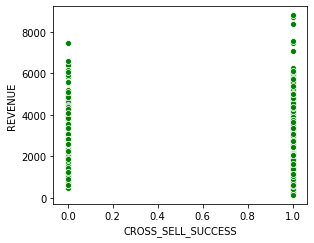

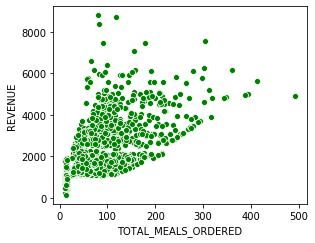

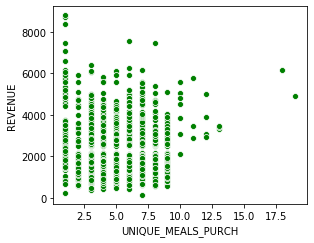

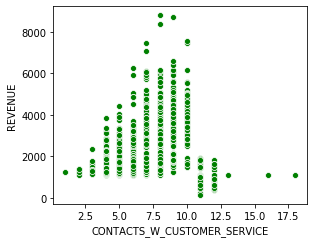

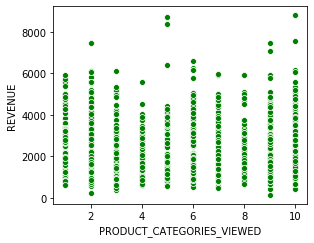

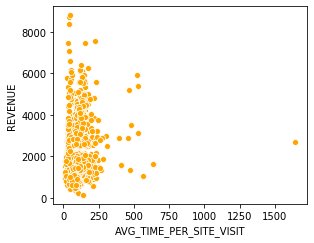

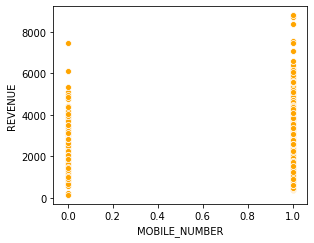

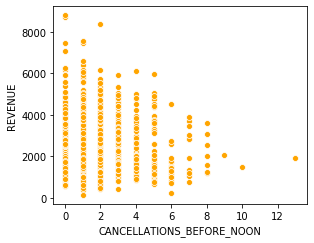

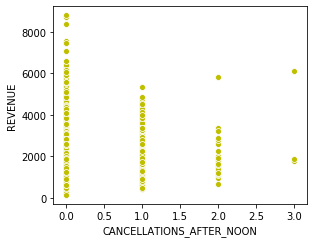

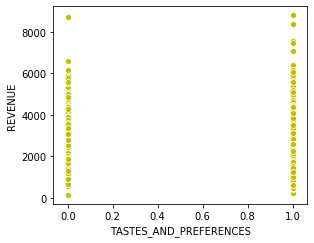

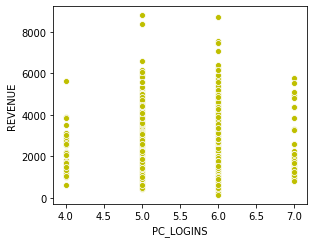

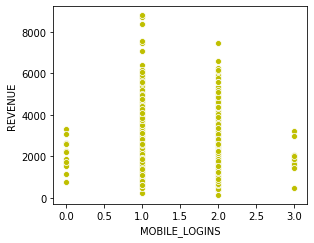

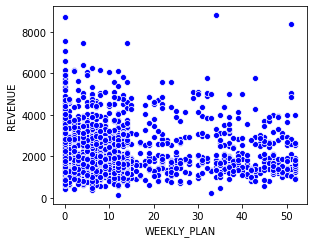

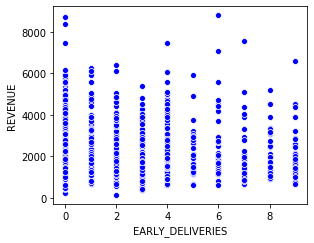

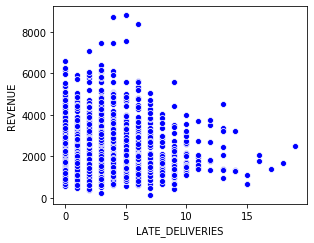

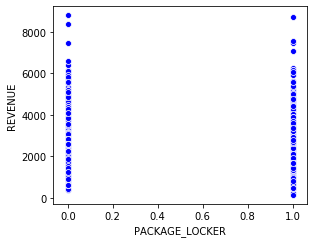

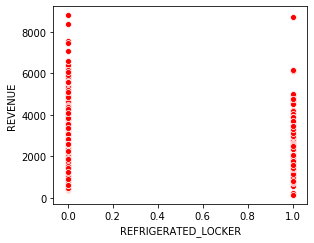

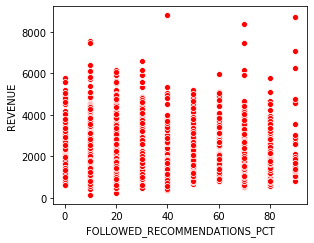

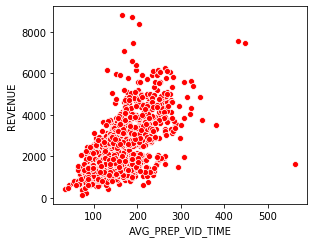

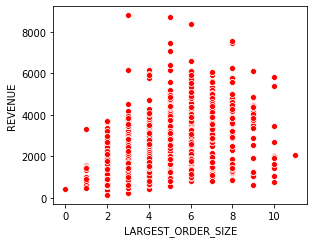

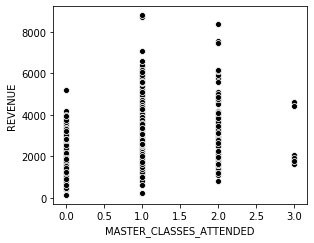

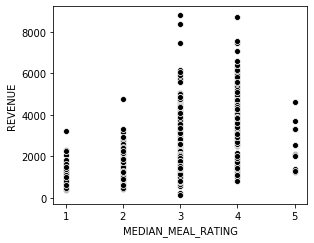

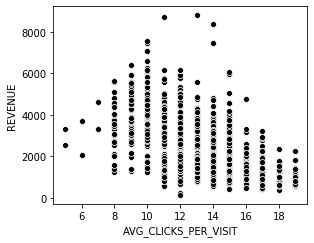

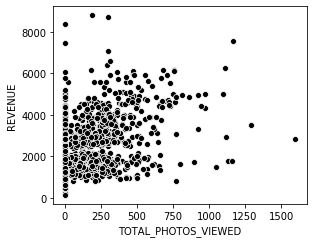

In [9]:
########################
# Visual EDA (Scatterplots)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['CROSS_SELL_SUCCESS'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('CROSS_SELL_SUCCESS')

########################################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['TOTAL_MEALS_ORDERED'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['UNIQUE_MEALS_PURCH'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['CONTACTS_W_CUSTOMER_SERVICE'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')
plt.savefig('Apprentice Chef Data Histograms 1 of 6.png')
plt.show()

########################################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['PRODUCT_CATEGORIES_VIEWED'],
                y = original_df['REVENUE'],
                color = 'g')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')

########################################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['AVG_TIME_PER_SITE_VISIT'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['MOBILE_NUMBER'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('MOBILE_NUMBER')

########################################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['CANCELLATIONS_BEFORE_NOON'],
                y = original_df['REVENUE'],
                color = 'orange')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')
plt.savefig('Apprentice Chef Data Histograms 2 of 6.png')
plt.show()

########################################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['CANCELLATIONS_AFTER_NOON'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['TASTES_AND_PREFERENCES'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('TASTES_AND_PREFERENCES')

########################################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['PC_LOGINS'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('PC_LOGINS')

########################################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['MOBILE_LOGINS'],
                y = original_df['REVENUE'],
                color = 'y')
plt.xlabel('MOBILE_LOGINS')
plt.savefig('Apprentice Chef Data Histograms 3 of 6.png')
plt.show()

########################################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['WEEKLY_PLAN'],
                y = original_df['REVENUE'],
                color = 'blue')
plt.xlabel('WEEKLY_PLAN')

########################################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['EARLY_DELIVERIES'],
                y = original_df['REVENUE'],
                color = 'blue')
plt.xlabel('EARLY_DELIVERIES')

########################################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['LATE_DELIVERIES'],
                y = original_df['REVENUE'],
                color = 'blue')
plt.xlabel('LATE_DELIVERIES')

########################################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['PACKAGE_LOCKER'],
                y = original_df['REVENUE'],
                color = 'blue')
plt.xlabel('PACKAGE_LOCKER')
plt.savefig('Apprentice Chef Data Histograms 4 of 6.png')
plt.show()
########################################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['REFRIGERATED_LOCKER'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('REFRIGERATED_LOCKER')

########################################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

########################################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['AVG_PREP_VID_TIME'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('AVG_PREP_VID_TIME')

########################################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['LARGEST_ORDER_SIZE'],
                y = original_df['REVENUE'],
                color = 'r')
plt.xlabel('LARGEST_ORDER_SIZE')
plt.savefig('Apprentice Chef Data Histograms 5 of 6.png')
plt.show()

########################################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['MASTER_CLASSES_ATTENDED'],
                y = original_df['REVENUE'],
                color = 'black')
plt.xlabel('MASTER_CLASSES_ATTENDED')

########################################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['MEDIAN_MEAL_RATING'],
                y = original_df['REVENUE'],
                color = 'black')
plt.xlabel('MEDIAN_MEAL_RATING')

########################################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['AVG_CLICKS_PER_VISIT'],
                y = original_df['REVENUE'],
                color = 'black')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################################
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['TOTAL_PHOTOS_VIEWED'],
                y = original_df['REVENUE'],
                color = 'black')
plt.xlabel('TOTAL_PHOTOS_VIEWED')
plt.savefig('Apprentice Chef Data Histograms 6 of 6.png')
plt.show()




In [10]:
# setting trend-based thresholds
TOTAL_MEALS_ORDERED_hi  = 300 
UNIQUE_MEALS_PURCH_hi = 10
CONTACTS_W_CUSTOMER_SERVICE_hi  = 10
AVG_TIME_PER_SITE_VISIT_hi = 350 
CANCELLATIONS_BEFORE_NOON_hi = 8 
CANCELLATIONS_AFTER_NOON_hi    = 2.0 
LATE_DELIVERIES_hi    = 16 
AVG_PREP_VID_TIME_hi = 300 
TOTAL_PHOTOS_VIEWED_hi  =  680 

We can see the trands changing in the variables: We can see that data starts to scatter on the points we gave them above.

# Feature Engineering 

In [11]:
# developing features for outliers
               

# Total Meals Ordered
original_df['change_TOTAL_MEALS_ORDERED'] = 0
condition = original_df.loc[0:,'change_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]

original_df['change_TOTAL_MEALS_ORDERED'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)



# Unique Meals Purchased
original_df['change_UNIQUE_MEALS_PURCH'] = 0
condition = original_df.loc[0:,'change_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi]

original_df['change_UNIQUE_MEALS_PURCH'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


# Contacts with Customer Service
original_df['change_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition = original_df.loc[0:,'change_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]

original_df['change_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Average time per visit
original_df['change_AVG_TIME_PER_SITE_VISIT'] = 0
condition = original_df.loc[0:,'change_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]

original_df['change_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Cancellations Before Noon
original_df['change_CANCELLATIONS_BEFORE_NOON'] = 0
condition = original_df.loc[0:,'change_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]

original_df['change_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Cancellations After Noon
original_df['change_CANCELLATIONS_AFTER_NOON'] = 0
condition = original_df.loc[0:,'change_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_hi]

original_df['change_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Late Deliveries
original_df['change_LATE_DELIVERIES'] = 0
condition = original_df.loc[0:,'change_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] > LATE_DELIVERIES_hi]

original_df['change_LATE_DELIVERIES'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Average Prep Vid Time
original_df['change_AVG_PREP_VID_TIME'] = 0
condition = original_df.loc[0:,'change_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]

original_df['change_AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# Total Photos Viewed
original_df['change_TOTAL_PHOTOS_VIEWED'] = 0
condition = original_df.loc[0:,'change_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_hi]

original_df['change_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)



In [12]:
# creating a correlation matrix
df_corr = original_df.corr().round(2)


# printing (Pearson) correlations with Revenue
print(df_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                               1.00
AVG_PREP_VID_TIME                     0.64
MEDIAN_MEAL_RATING                    0.61
TOTAL_MEALS_ORDERED                   0.60
TOTAL_PHOTOS_VIEWED                   0.47
MASTER_CLASSES_ATTENDED               0.45
LARGEST_ORDER_SIZE                    0.44
out_TOTAL_PHOTOS_VIEWED               0.28
out_TOTAL_MEALS_ORDERED               0.23
change_TOTAL_PHOTOS_VIEWED            0.23
change_TOTAL_MEALS_ORDERED            0.23
change_AVG_PREP_VID_TIME              0.19
out_AVG_PREP_VID_TIME                 0.19
out_UNIQUE_MEALS_PURCH                0.17
out_LARGEST_ORDER_SIZE                0.16
AVG_TIME_PER_SITE_VISIT               0.14
change_UNIQUE_MEALS_PURCH             0.13
CONTACTS_W_CUSTOMER_SERVICE           0.10
change_AVG_TIME_PER_SITE_VISIT        0.07
change_CANCELLATIONS_AFTER_NOON       0.04
PRODUCT_CATEGORIES_VIEWED             0.03
out_AVG_TIME_PER_SITE_VISIT           0.03
MOBILE_NUMBER                         0.03
PC_LOGINS  

We have an Email column which can give as a good insights about our marketing strategy. Let's see how many people use their professional or personal emails and how many emails actually do not reach to their in-box.

In [13]:
# Train/Test Split 
# splitting professional, personal and junk emails

# placeholder list
users_lst = []

# looping over each email address
for index, col in original_df.iterrows():
    
    # splitting email domain at '@'
    split_email = original_df.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    users_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
emails_df = pd.DataFrame(users_lst)


# displaying the results
emails_df


,0,1
0,addam.osgrey,passport.com
1,aegon.blackfyre,jnj.com
2,aegon.frey.(son.of.aenys),gmail.com
3,aegon.targaryen.(son.of.rhaegar),ibm.com
4,aegon.v.targaryen,goldmansacs.com
...,...,...
1941,yandry,yahoo.com
1942,yorkel,gmail.com
1943,young.henly,gmail.com
1944,ysilla,protonmail.com


In [14]:
# renaming column to concatenate
emails_df.columns = ['name' , 'email_domain']


# concatenating personal_email_domain with friends DataFrame
original_df = pd.concat([original_df, emails_df.loc[:, 'email_domain']],
                   axis = 1)


# printing value counts of personal_email_domain
original_df.loc[: ,'email_domain'].value_counts()

# email domain types
personal_email_domains      = ['@gmail.com', '@yahoo.com', '@protonmail.com']
professional_email_domains  = ['@mmm.com','@amex.com','@apple.com','@boeing.com',
                               '@caterpillar.com','@chevron.com','@cisco.com','@cocacola.com',
                               '@disney.com','@dupont.com', '@exxon.com','@ge.org','@goldmansacs.com',
                               '@homedepot.com','@ibm.com','@intel.com','@jnj.com','@jpmorgan.com',
                               '@mcdonalds.com','@merck.com','@microsoft.com','@nike.com',
                               '@pfizer.com','@pg.com','@travelers.com','@unitedtech.com',
                               '@unitedhealth.com','@verizon.com','@visa.com','@walmart.com']

junk_email_domains          = ['@me.com', '@aol.com', '@hotmail.com', '@live.com', '@msn.com', '@passport.com']

users_lst = []


# looping to group observations by domain type
for domain in original_df['email_domain']:
        if '@' + domain in personal_email_domains:
            users_lst.append('personal')
            
        elif '@' + domain in professional_email_domains:
            users_lst.append('professional')
        
        elif '@' + domain in junk_email_domains:
            users_lst.append('junk')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
original_df['domain_group'] = pd.Series(users_lst)


# checking results
original_df['domain_group'].value_counts()

personal        861
professional    696
junk            389
Name: domain_group, dtype: int64

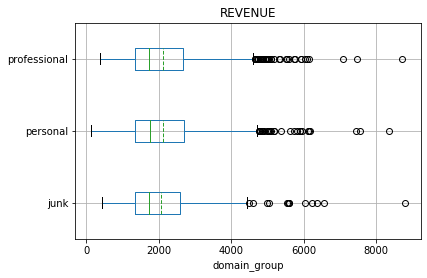

In [15]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
This function can be used for categorical variables

PARAMETERS
----------
response : str, response variable
cat_var  : str, categorical variable
data     : DataFrame of the response and categorical variables
"""

    data.boxplot(column  = response,
    	            by = cat_var,
        	        vert 	     = False,
            	    patch_artist = False,
                	meanline     = True,
               		showmeans    = True)

    plt.suptitle("")
    plt.show()


# calling the function for each categorical variable
categorical_boxplots(response = 'REVENUE',
cat_var  = 'domain_group',
data     = original_df)

In [16]:
# making a copy of dataset
original_df_explanatory = original_df.copy()


# dropping Revenue and other variables we think does not make big change from the explanatory variable set
original_df_explanatory = original_df_explanatory.drop(columns=['REVENUE', 'NAME', 'FIRST_NAME', 'FAMILY_NAME', 'EMAIL', 'email_domain', 'm_FAMILY_NAME'])


# formatting each explanatory variable for statsmodels
for val in original_df_explanatory:
    print(f"original_df['{val}'] +")

original_df['CROSS_SELL_SUCCESS'] +
original_df['TOTAL_MEALS_ORDERED'] +
original_df['UNIQUE_MEALS_PURCH'] +
original_df['CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['PRODUCT_CATEGORIES_VIEWED'] +
original_df['AVG_TIME_PER_SITE_VISIT'] +
original_df['MOBILE_NUMBER'] +
original_df['CANCELLATIONS_BEFORE_NOON'] +
original_df['CANCELLATIONS_AFTER_NOON'] +
original_df['TASTES_AND_PREFERENCES'] +
original_df['PC_LOGINS'] +
original_df['MOBILE_LOGINS'] +
original_df['WEEKLY_PLAN'] +
original_df['EARLY_DELIVERIES'] +
original_df['LATE_DELIVERIES'] +
original_df['PACKAGE_LOCKER'] +
original_df['REFRIGERATED_LOCKER'] +
original_df['FOLLOWED_RECOMMENDATIONS_PCT'] +
original_df['AVG_PREP_VID_TIME'] +
original_df['LARGEST_ORDER_SIZE'] +
original_df['MASTER_CLASSES_ATTENDED'] +
original_df['MEDIAN_MEAL_RATING'] +
original_df['AVG_CLICKS_PER_VISIT'] +
original_df['TOTAL_PHOTOS_VIEWED'] +
original_df['out_TOTAL_MEALS_ORDERED'] +
original_df['out_UNIQUE_MEALS_PURCH'] +
original_df['out_CONTACTS_W_CUSTO

In [17]:
# saving feature-rich dataset in Excel
original_df.to_excel('Apprentice_Chef_rich.xlsx',
                 index = False)

In [18]:
# building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """original_df['REVENUE'] ~
original_df['CROSS_SELL_SUCCESS'] +
original_df['TOTAL_MEALS_ORDERED'] +
original_df['UNIQUE_MEALS_PURCH'] +
original_df['CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['PRODUCT_CATEGORIES_VIEWED'] +
original_df['AVG_TIME_PER_SITE_VISIT'] +
original_df['MOBILE_NUMBER'] +
original_df['CANCELLATIONS_BEFORE_NOON'] +
original_df['CANCELLATIONS_AFTER_NOON'] +
original_df['TASTES_AND_PREFERENCES'] +
original_df['PC_LOGINS'] +
original_df['MOBILE_LOGINS'] +
original_df['WEEKLY_PLAN'] +
original_df['EARLY_DELIVERIES'] +
original_df['LATE_DELIVERIES'] +
original_df['PACKAGE_LOCKER'] +
original_df['REFRIGERATED_LOCKER'] +
original_df['FOLLOWED_RECOMMENDATIONS_PCT'] +
original_df['AVG_PREP_VID_TIME'] +
original_df['LARGEST_ORDER_SIZE'] +
original_df['MASTER_CLASSES_ATTENDED'] +
original_df['MEDIAN_MEAL_RATING'] +
original_df['AVG_CLICKS_PER_VISIT'] +
original_df['TOTAL_PHOTOS_VIEWED'] +
original_df['out_TOTAL_MEALS_ORDERED'] +
original_df['out_UNIQUE_MEALS_PURCH'] +
original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['out_PRODUCT_CATEGORIES_VIEWED'] +
original_df['out_AVG_TIME_PER_SITE_VISIT'] +
original_df['out_CANCELLATIONS_BEFORE_NOON'] +
original_df['out_CANCELLATIONS_AFTER_NOON'] +
original_df['out_PC_LOGINS'] +
original_df['out_MOBILE_LOGINS'] +
original_df['out_WEEKLY_PLAN'] +
original_df['out_EARLY_DELIVERIES'] +
original_df['out_LATE_DELIVERIES'] +
original_df['out_AVG_PREP_VID_TIME'] +
original_df['out_FOLLOWED_RECOMMENDATIONS_PCT'] +
original_df['out_LARGEST_ORDER_SIZE'] +
original_df['out_AVG_CLICKS_PER_VISIT'] +
original_df['out_TOTAL_PHOTOS_VIEWED'] +
original_df['change_TOTAL_MEALS_ORDERED'] +
original_df['change_UNIQUE_MEALS_PURCH'] +
original_df['change_CONTACTS_W_CUSTOMER_SERVICE'] +
original_df['change_AVG_TIME_PER_SITE_VISIT'] +
original_df['change_CANCELLATIONS_BEFORE_NOON'] +
original_df['change_CANCELLATIONS_AFTER_NOON'] +
original_df['change_LATE_DELIVERIES'] +
original_df['change_AVG_PREP_VID_TIME'] +
original_df['change_TOTAL_PHOTOS_VIEWED'] +
original_df['domain_group'] """,
                        data = original_df)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     original_df['REVENUE']   R-squared:                       0.665
Model:                                OLS   Adj. R-squared:                  0.657
Method:                     Least Squares   F-statistic:                     82.07
Date:                    Sat, 07 Mar 2020   Prob (F-statistic):               0.00
Time:                            19:26:52   Log-Likelihood:                -15390.
No. Observations:                    1946   AIC:                         3.087e+04
Df Residuals:                        1899   BIC:                         3.114e+04
Df Model:                              46                                         
Covariance Type:                nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                           -98.4067    336.856     -0.292      0.770    -759.054     562.241
original_df['domain_group'][T.personal]              22.6079     42.210      0.536      0.592     -60.175     105.390
original_df['domain_group'][T.professional]          30.0248     44.611      0.673      0.501     -57.467     117.517
original_df['CROSS_SELL_SUCCESS']                   -89.6363     39.181     -2.288      0.022    -166.478     -12.794
original_df['TOTAL_MEALS_ORDERED']                    4.3839      0.401     10.923      0.000       3.597       5.171
original_df['UNIQUE_MEALS_PURCH']                   -64.9256      6.466    -10.042      0.000     -77.606     -52.245
original_df['CONTACTS_W_CUSTOMER_SERVICE']          134.7718     10.925     12.336      0.000     113.345     156.199
original_df['PRODUCT_CATEGORIES_VIEWED']              6.9394      5.061      1.371      0.171      -2.987      16.866
original_df['AVG_TIME_PER_SITE_VISIT']               -0.7115      0.374     -1.901      0.057      -1.445       0.022
original_df['MOBILE_NUMBER']                         17.6907     47.078      0.376      0.707     -74.640     110.021
original_df['CANCELLATIONS_BEFORE_NOON']              4.9807     11.943      0.417      0.677     -18.442      28.403
original_df['CANCELLATIONS_AFTER_NOON']             -62.0481     36.774     -1.687      0.092    -134.170      10.074
original_df['TASTES_AND_PREFERENCES']                40.0563     33.915      1.181      0.238     -26.458     106.571
original_df['PC_LOGINS']                              9.2797     26.322      0.353      0.724     -42.343      60.902
original_df['MOBILE_LOGINS']                        -31.3407     29.945     -1.047      0.295     -90.068      27.387
original_df['WEEKLY_PLAN']                           -1.0387      1.211     -0.858      0.391      -3.413       1.336
original_df['EARLY_DELIVERIES']                      -4.4133     11.156     -0.396      0.692     -26.293      17.467
original_df['LATE_DELIVERIES']                       -1.7446      9.253     -0.189      0.850     -19.892      16.402
original_df['PACKAGE_LOCKER']                       -30.3439     36.435     -0.833      0.405    -101.801      41.113
original_df['REFRIGERATED_LOCKER']                   -1.0357     55.004     -0.019      0.985    -108.910     106.838
original_df['FOLLOWED_RECOMMENDATIONS_PCT']          -0.1445      0.653     -0.221      0.825      -1.426       1.137
original_df['AVG_PREP_VID_TIME']                      8.3837      0.664     12.630      0.000       7.082       9.686
original_df['LARGEST_ORDER_SIZE']                   -82.6144     17.707     -4.666      0

In [19]:
# preparing explanatory variable data
original_df_data   = original_df.drop(['REVENUE'],
                               axis = 1)


# preparing response variable data
original_df_target = original_df.loc[:, 'REVENUE']


# preparing training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
            original_df_data,
            original_df_target,
            test_size = 0.25,
            random_state = 222)


# Training set 
print(X_train.shape)
print(y_train.shape)

# Testing set
print(X_test.shape)
print(y_test.shape)

(1459, 57)
(1459,)
(487, 57)
(487,)


In [21]:
x_variables = ['TOTAL_MEALS_ORDERED',
               'UNIQUE_MEALS_PURCH',
               'PRODUCT_CATEGORIES_VIEWED',
               'AVG_TIME_PER_SITE_VISIT', 
               'MOBILE_NUMBER', 
               'CANCELLATIONS_BEFORE_NOON', 
               'CANCELLATIONS_AFTER_NOON', 
               'TASTES_AND_PREFERENCES', 
               'WEEKLY_PLAN', 
               'EARLY_DELIVERIES',
               'LATE_DELIVERIES', 
               'PACKAGE_LOCKER', 
               'REFRIGERATED_LOCKER',
               'AVG_PREP_VID_TIME',
               'LARGEST_ORDER_SIZE', 
               'MASTER_CLASSES_ATTENDED',
               'MEDIAN_MEAL_RATING', 
               'AVG_CLICKS_PER_VISIT',
               'out_TOTAL_MEALS_ORDERED', 
               'out_AVG_TIME_PER_SITE_VISIT',
               'out_CANCELLATIONS_BEFORE_NOON', 
               'out_CANCELLATIONS_AFTER_NOON',
               'out_WEEKLY_PLAN', 
               'out_EARLY_DELIVERIES',
               'out_LATE_DELIVERIES', 
               'TOTAL_PHOTOS_VIEWED',
               'out_AVG_CLICKS_PER_VISIT',
               'out_LARGEST_ORDER_SIZE',
               'out_AVG_PREP_VID_TIME', 
               'change_TOTAL_MEALS_ORDERED', 
               'change_TOTAL_PHOTOS_VIEWED',
               'change_AVG_PREP_VID_TIME',
               'change_AVG_TIME_PER_SITE_VISIT', 
               'change_CANCELLATIONS_AFTER_NOON',
               'change_CANCELLATIONS_BEFORE_NOON', 
               'change_LATE_DELIVERIES', 
               'change_UNIQUE_MEALS_PURCH',
               'change_CONTACTS_W_CUSTOMER_SERVICE']

# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"original_df_train['{val}'] +")

original_df_train['TOTAL_MEALS_ORDERED'] +
original_df_train['UNIQUE_MEALS_PURCH'] +
original_df_train['PRODUCT_CATEGORIES_VIEWED'] +
original_df_train['AVG_TIME_PER_SITE_VISIT'] +
original_df_train['MOBILE_NUMBER'] +
original_df_train['CANCELLATIONS_BEFORE_NOON'] +
original_df_train['CANCELLATIONS_AFTER_NOON'] +
original_df_train['TASTES_AND_PREFERENCES'] +
original_df_train['WEEKLY_PLAN'] +
original_df_train['EARLY_DELIVERIES'] +
original_df_train['LATE_DELIVERIES'] +
original_df_train['PACKAGE_LOCKER'] +
original_df_train['REFRIGERATED_LOCKER'] +
original_df_train['AVG_PREP_VID_TIME'] +
original_df_train['LARGEST_ORDER_SIZE'] +
original_df_train['MASTER_CLASSES_ATTENDED'] +
original_df_train['MEDIAN_MEAL_RATING'] +
original_df_train['AVG_CLICKS_PER_VISIT'] +
original_df_train['out_TOTAL_MEALS_ORDERED'] +
original_df_train['out_AVG_TIME_PER_SITE_VISIT'] +
original_df_train['out_CANCELLATIONS_BEFORE_NOON'] +
original_df_train['out_CANCELLATIONS_AFTER_NOON'] +
original_df_train['out_WE

In [22]:
# merging X_train and y_train so that they can be used in statsmodels

original_df_train = pd.concat([X_train, y_train], axis = 1)


# Step 1: build a model
lm_best = smf.ols(formula =  """REVENUE ~

original_df_train['TOTAL_MEALS_ORDERED'] +
original_df_train['UNIQUE_MEALS_PURCH'] +
original_df_train['PRODUCT_CATEGORIES_VIEWED'] +
original_df_train['AVG_TIME_PER_SITE_VISIT'] +
original_df_train['MOBILE_NUMBER'] +
original_df_train['CANCELLATIONS_BEFORE_NOON'] +
original_df_train['CANCELLATIONS_AFTER_NOON'] +
original_df_train['TASTES_AND_PREFERENCES'] +
original_df_train['WEEKLY_PLAN'] +
original_df_train['EARLY_DELIVERIES'] +
original_df_train['LATE_DELIVERIES'] +
original_df_train['PACKAGE_LOCKER'] +
original_df_train['REFRIGERATED_LOCKER'] +
original_df_train['AVG_PREP_VID_TIME'] +
original_df_train['LARGEST_ORDER_SIZE'] +
original_df_train['MASTER_CLASSES_ATTENDED'] +
original_df_train['MEDIAN_MEAL_RATING'] +
original_df_train['AVG_CLICKS_PER_VISIT'] +
original_df_train['out_TOTAL_MEALS_ORDERED'] +
original_df_train['out_AVG_TIME_PER_SITE_VISIT'] +
original_df_train['out_CANCELLATIONS_BEFORE_NOON'] +
original_df_train['out_CANCELLATIONS_AFTER_NOON'] +
original_df_train['out_WEEKLY_PLAN'] +
original_df_train['out_EARLY_DELIVERIES'] +
original_df_train['out_LATE_DELIVERIES'] +
original_df_train['TOTAL_PHOTOS_VIEWED'] +
original_df_train['out_AVG_CLICKS_PER_VISIT'] +
original_df_train['out_LARGEST_ORDER_SIZE'] +
original_df_train['out_AVG_PREP_VID_TIME'] +
original_df_train['change_TOTAL_MEALS_ORDERED'] +
original_df_train['change_TOTAL_PHOTOS_VIEWED'] +
original_df_train['change_AVG_PREP_VID_TIME'] +
original_df_train['change_AVG_TIME_PER_SITE_VISIT'] +
original_df_train['change_CANCELLATIONS_AFTER_NOON'] +
original_df_train['change_CANCELLATIONS_BEFORE_NOON'] +
original_df_train['change_LATE_DELIVERIES'] +
original_df_train['change_UNIQUE_MEALS_PURCH'] +
original_df_train['change_CONTACTS_W_CUSTOMER_SERVICE']  
""",
                                data = original_df_train)


# Step 2: fit the model based on the data
output = lm_best.fit()



# Step 3: analyze the summary output
print(output.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     77.40
Date:                Sat, 07 Mar 2020   Prob (F-statistic):          6.29e-300
Time:                        19:26:58   Log-Likelihood:                -11543.
No. Observations:                1459   AIC:                         2.316e+04
Df Residuals:                    1423   BIC:                         2.335e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

# SCIKIT-LEARN MODEL 

In [23]:
# applying modelin scikit-learn

# preparing x-variables
original_df_data = ['TOTAL_MEALS_ORDERED',
                    'UNIQUE_MEALS_PURCH',
               'PRODUCT_CATEGORIES_VIEWED',
                    'AVG_TIME_PER_SITE_VISIT', 
                    'MOBILE_NUMBER', 
                    'CANCELLATIONS_BEFORE_NOON',
               'CANCELLATIONS_AFTER_NOON',
                    'TASTES_AND_PREFERENCES',
               'WEEKLY_PLAN',
                    'EARLY_DELIVERIES', 
                    'LATE_DELIVERIES',
               'PACKAGE_LOCKER',
                    'REFRIGERATED_LOCKER',
                    'AVG_PREP_VID_TIME', 
                    'LARGEST_ORDER_SIZE',
               'MASTER_CLASSES_ATTENDED',
                    'MEDIAN_MEAL_RATING',
                    'AVG_CLICKS_PER_VISIT',
               'out_TOTAL_MEALS_ORDERED', 
                    'out_AVG_TIME_PER_SITE_VISIT',
               'out_CANCELLATIONS_BEFORE_NOON', 
                    'out_CANCELLATIONS_AFTER_NOON',
                    'out_WEEKLY_PLAN', 
               'out_EARLY_DELIVERIES', 
                    'out_LATE_DELIVERIES', 
               'TOTAL_PHOTOS_VIEWED',
                    'out_AVG_CLICKS_PER_VISIT',
                    'out_LARGEST_ORDER_SIZE', 
                    'out_AVG_PREP_VID_TIME',
               'change_TOTAL_MEALS_ORDERED',
                    'change_TOTAL_PHOTOS_VIEWED',
                    'change_AVG_PREP_VID_TIME', 
                    'change_AVG_TIME_PER_SITE_VISIT',
               'change_CANCELLATIONS_AFTER_NOON', 
                    'change_CANCELLATIONS_BEFORE_NOON',
                    'change_LATE_DELIVERIES',
               'change_UNIQUE_MEALS_PURCH',
                    'change_CONTACTS_W_CUSTOMER_SERVICE']

# preparing response variable
original_df_target = ['REVENUE']


# running train/test split again
X_train, X_test, y_train, y_test = train_test_split(
            original_df[original_df_data],
            original_df[original_df_target],
            test_size = 0.25,
            random_state = 222)

In [24]:
# applying modelin scikit-learn

# preparing x-variables
original_df_data = ['TOTAL_MEALS_ORDERED',
                    'UNIQUE_MEALS_PURCH',
               'PRODUCT_CATEGORIES_VIEWED',
                    'AVG_TIME_PER_SITE_VISIT', 
                    'MOBILE_NUMBER', 
                    'CANCELLATIONS_BEFORE_NOON',
               'CANCELLATIONS_AFTER_NOON',
                    'TASTES_AND_PREFERENCES',
               'WEEKLY_PLAN',
                    'EARLY_DELIVERIES', 
                    'LATE_DELIVERIES',
               'PACKAGE_LOCKER',
                    'REFRIGERATED_LOCKER',
                    'AVG_PREP_VID_TIME', 
                    'LARGEST_ORDER_SIZE',
               'MASTER_CLASSES_ATTENDED',
                    'MEDIAN_MEAL_RATING',
                    'AVG_CLICKS_PER_VISIT',
               'out_TOTAL_MEALS_ORDERED', 
                    'out_AVG_TIME_PER_SITE_VISIT',
               'out_CANCELLATIONS_BEFORE_NOON', 
                    'out_CANCELLATIONS_AFTER_NOON',
                    'out_WEEKLY_PLAN', 
               'out_EARLY_DELIVERIES', 
                    'out_LATE_DELIVERIES', 
               'TOTAL_PHOTOS_VIEWED',
                    'out_AVG_CLICKS_PER_VISIT',
                    'out_LARGEST_ORDER_SIZE', 
                    'out_AVG_PREP_VID_TIME',
               'change_TOTAL_MEALS_ORDERED',
                    'change_TOTAL_PHOTOS_VIEWED',
                    'change_AVG_PREP_VID_TIME', 
                    'change_AVG_TIME_PER_SITE_VISIT',
               'change_CANCELLATIONS_AFTER_NOON', 
                    'change_CANCELLATIONS_BEFORE_NOON',
                    'change_LATE_DELIVERIES',
               'change_UNIQUE_MEALS_PURCH',
                    'change_CONTACTS_W_CUSTOMER_SERVICE']

# preparing response variable
original_df_target = ['REVENUE']


# running train/test split again
X_train, X_test, y_train, y_test = train_test_split(
            original_df[original_df_data],
            original_df[original_df_target],
            test_size = 0.25,
            random_state = 222)

In [25]:
# LinearRegression Model

# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)


# SCORING the results
print('Training Score:', lr.score(X_train, y_train).round(3))
print('Testing Score:',  lr.score(X_test, y_test).round(3))

lr_train_score = lr.score(X_train, y_train).round(3)
lr_test_score  = lr.score(X_test, y_test).round(3)

Training Score: 0.656
Testing Score: 0.549


# Ridge model

In [26]:
# LinearModel(Ridge)
# INSTANTIATING a model object
import sklearn.linear_model # linear models

ridge_model = sklearn.linear_model.Ridge()

# FITTING the training data
ridge_fit  = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_fit.predict(X_test)

print('Training Score:', ridge_model.score(X_train, y_train).round(2))
print('Testing Score:',  ridge_model.score(X_test, y_test).round(2))


# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(2)
ridge_test_score  = ridge_model.score(X_test, y_test).round(2)

Training Score: 0.66
Testing Score: 0.55


# Lasso model

In [27]:
# LinearModel(Lasso)
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso()

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_test)

print('Training Score:', lasso_model.score(X_train, y_train).round(3))
print('Testing Score:', lasso_model.score(X_train, y_train).round(3))


# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(3)
lasso_test_score  = lasso_model.score(X_test, y_test).round(3)

Training Score: 0.654
Testing Score: 0.654


# GBT model

In [28]:
# GBT
from sklearn.ensemble import GradientBoostingRegressor

# GradientBoostingRegressor

# INSTANTIATING a model object
gbt = GradientBoostingRegressor(n_estimators= 1600,random_state= 222)


# FITTING the training data
gbt_fit = gbt.fit(X_train, y_train)
random_state= 222

# PREDICTING on new data
gbt_pred = gbt_fit.predict(X_test)


print('Training Score:', gbt.score(X_train, y_train).round(3))
print('Testing Score:',  gbt.score(X_test, y_test).round(3))


# saving scoring data for future use
gbt_train_score = gbt.score(X_train, y_train).round(3)
gbt_test_score  = gbt.score(X_test, y_test).round(3)

C:\Users\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Score: 0.996
Testing Score: 0.755


# Comparing results

In [30]:


print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}           {lr_test_score}
Ridge      {ridge_train_score}        {ridge_test_score}
Lasso      {lasso_train_score}        {lasso_test_score}
GBT        {gbt_train_score}          {gbt_test_score}
""")


# creating a dictionary for model results
model_performance = {'Model'    : ['OLS', 'Ridge', 'Lasso', 'GBT'],
           
                     'Training' : [lr_train_score, ridge_train_score,
                                   lasso_train_score, 
                                  gbt_train_score],
           
                     'Testing'  : [lr_test_score, ridge_test_score,
                                   lasso_test_score, gbt_test_score]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


# sending model results to Excel
model_performance.to_excel('regression_model_performance.xlsx',
                           index = False)


Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.656           0.549
Ridge      0.66        0.55
Lasso      0.654        0.55
GBT        0.996          0.755

